# Olympic Data Analysis

In [1]:
%matplotlib notebook

In [2]:
#Importing header files
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  

#Reading the file
data=pd.read_csv("OlympicData.csv")

#Renaming a column
data.rename(columns={'Total':'Total_Medals','# Summer':'Summer','# Winter':'Winter'},inplace=True)

#Printing the first five columns
data.head(5)

,Country_Name,Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [3]:
# Summer or Winter
#Creating new column 'Better_Event'
data['Better_Event'] = np.where(data['Total_Summer'] > data['Total_Winter'] , 'Summer', 'Winter')
data['Better_Event'] = np.where(data['Total_Summer'] == data['Total_Winter'] , 'Both', data['Better_Event'])

In [4]:
#Finding the value with max count in 'Better_Event' column
better_event=data['Better_Event'].value_counts().index.values[0]

#Printing the better event
print('Better_Event=', better_event)

Better_Event= Summer


In [5]:
# Top 10
#Subsetting the dataframe
top_countries=data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]

#Dropping the last row
top_countries=top_countries[:-1]
top_countries.head()

,Country_Name,Total_Summer,Total_Winter,Total_Medals
0,Afghanistan,2,0,2
1,Algeria,15,0,15
2,Argentina,70,0,70
3,Armenia,12,0,12
4,Australasia,12,0,12


In [6]:
#Function for top 10
def top_ten(data, col):
    
    #Creating a new list
    country_list=[]
    
    #Finding the top 10 values of 'col' column
    country_list= list((data.nlargest(10,col)['Country_Name']))
    
    #Returning the top 10 list
    return country_list

In [7]:
#Calling the function for Top 10 in Summer
top_10_summer=top_ten(top_countries,'Total_Summer')
print("Top 10 Summer:\n",top_10_summer, "\n")

#Calling the function for Top 10 in Winter
top_10_winter=top_ten(top_countries,'Total_Winter')
print("Top 10 Winter:\n",top_10_winter, "\n")

#Calling the function for Top 10 in both the events
top_10=top_ten(top_countries,'Total_Medals')
print("Top 10:\n",top_10, "\n")

#Extracting common country names from all three lists
common=list(set(top_10_summer) & set(top_10_winter) & set(top_10))

print('Common Countries :\n', common, "\n")

Top 10 Summer:
 ['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia'] 

Top 10 Winter:
 ['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia'] 

Top 10:
 ['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'East Germany', 'Russia'] 

Common Countries :
 ['Germany', 'United States', 'Sweden', 'Soviet Union'] 



In [8]:
# Plotting Top 10
#For Summer
#Creating the dataframe for Summer event
summer_df= data[data['Country_Name'].isin(top_10_summer)]
summer_df

,Country_Name,Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480,Summer
23,China,9,201,146,126,473,10,12,22,19,53,19,213,168,145,526,Summer
41,France,27,202,223,246,671,22,31,31,47,109,49,233,254,293,780,Summer
44,Germany,15,174,182,217,573,11,78,78,53,209,26,252,260,270,782,Summer
49,Great Britain,27,236,272,272,780,22,10,4,12,26,49,246,276,284,806,Summer
56,Hungary,25,167,144,165,476,22,0,2,4,6,47,167,146,169,482,Summer
64,Italy,26,198,166,185,549,22,37,34,43,114,48,235,200,228,663,Summer
106,Soviet Union,9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204,Summer
120,Sweden,26,143,164,176,483,22,50,40,54,144,48,193,204,230,627,Summer
135,United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,Summer


# Plotting Graphs

<IPython.core.display.Javascript object>


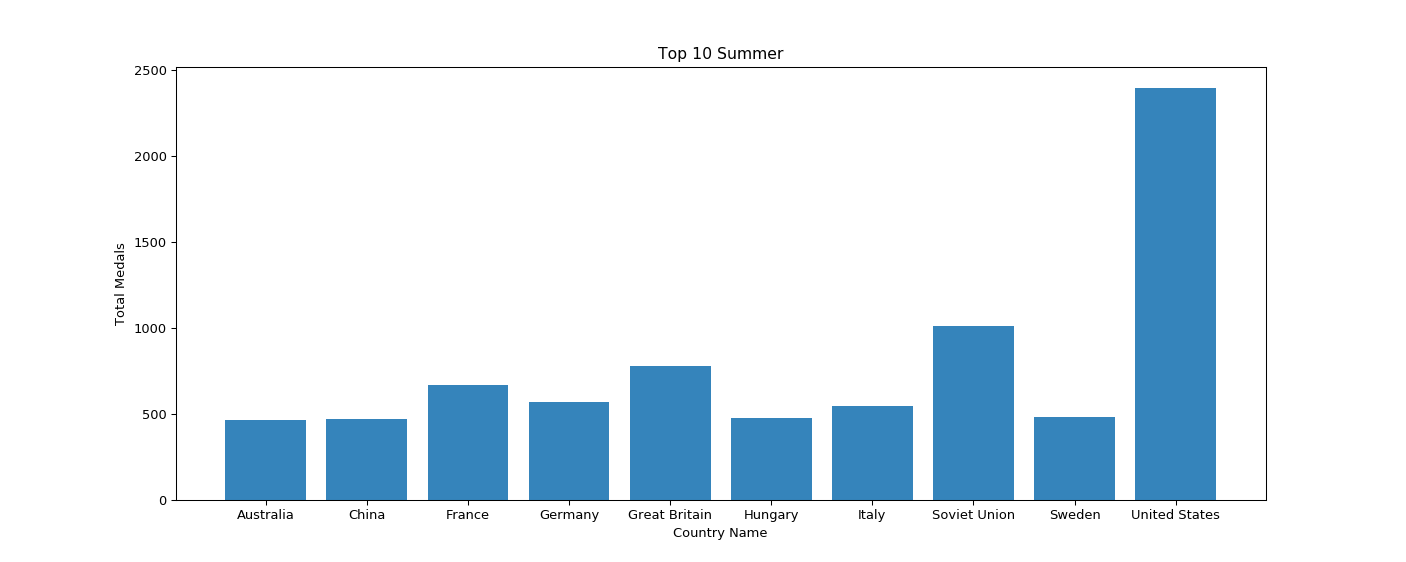

In [12]:
#Plotting the bar graph
plt.figure(figsize=(15, 6))
plt.bar(summer_df['Country_Name'], summer_df['Total_Summer'],alpha=0.9)

#Changing the graph title
plt.title('Top 10 Summer')

#Changing the x-axis label
plt.xlabel('Country Name')

#Changing the y-axis label
plt.ylabel('Total Medals')

plt.show()

<IPython.core.display.Javascript object>


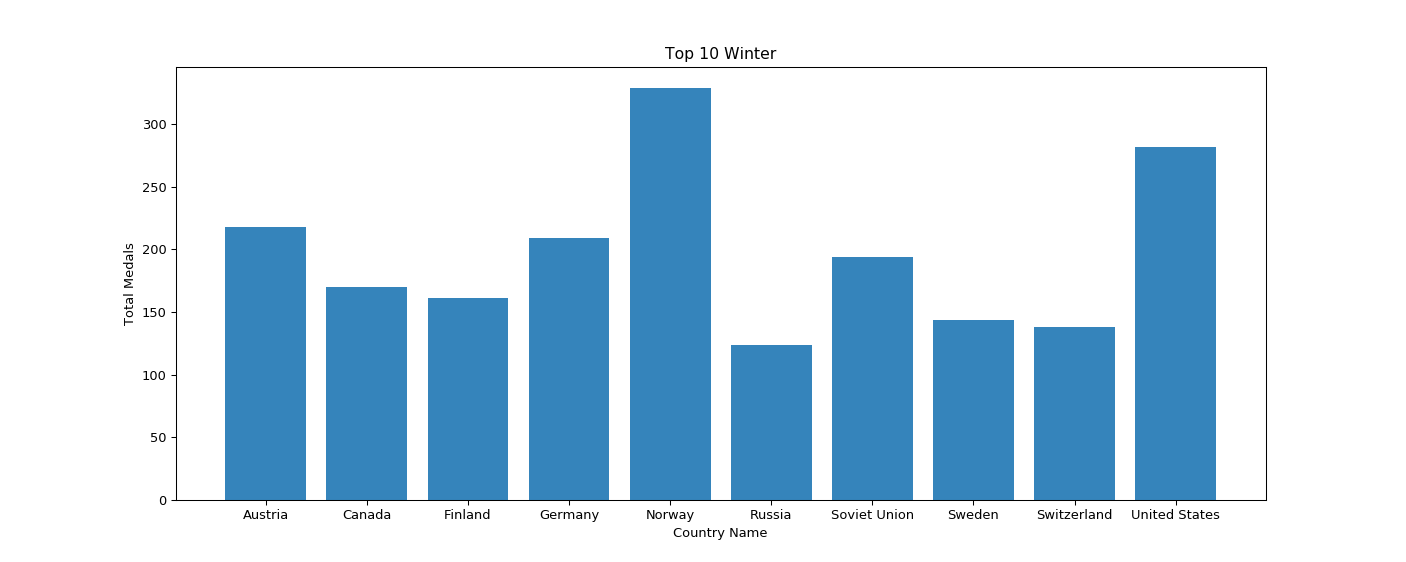

In [13]:
#For Winter
#Creating the dataframe for Winter event
winter_df=data[data['Country_Name'].isin(top_10_winter)]

#Plotting the bar graph
plt.figure(figsize=(15, 6))
plt.bar(winter_df['Country_Name'], winter_df['Total_Winter'],alpha=0.9)

#Changing the graph title
plt.title('Top 10 Winter')

#Changing the x-axis label
plt.xlabel('Country Name')

#Changing the y-axis label
plt.ylabel('Total Medals')

plt.show()

<IPython.core.display.Javascript object>


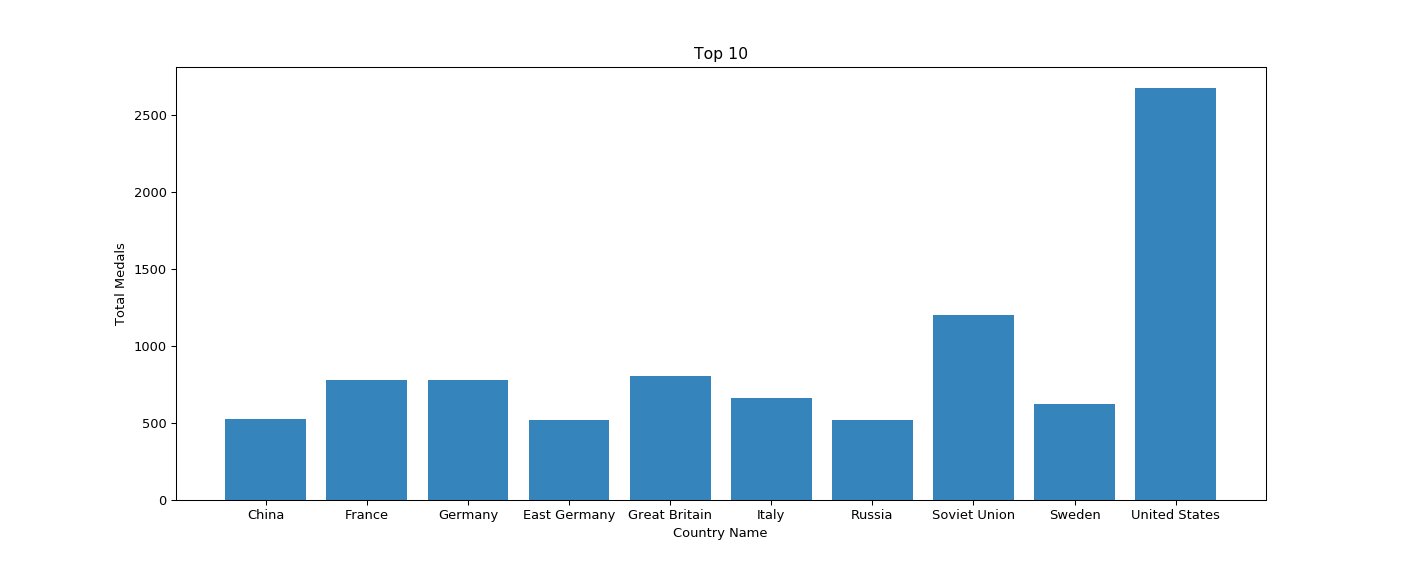

In [14]:
#For both the events

#Creating the dataframe for both the events
top_df=data[data['Country_Name'].isin(top_10)]

#Plotting the bar graph
plt.figure(figsize=(15, 6))
plt.bar(top_df['Country_Name'], top_df['Total_Medals'],alpha=0.9)

#Changing the graph title
plt.title('Top 10')

#Changing the x-axis label
plt.xlabel('Country Name')

#Changing the y-axis label
plt.ylabel('Total Medals')

plt.show()

In [15]:
# Top Performing countries
#For Summer List

#Creating new column 'Golden_Ratio'
summer_df['Golden_Ratio']=summer_df['Gold_Summer']/summer_df['Total_Summer']

#Finding the max value of 'Golden_Ratio' column
summer_max_ratio=max(summer_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
summer_country_gold=summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Summer Country:", summer_country_gold, " with a ratio of %.2f" %summer_max_ratio )

Top Summer Country: China  with a ratio of 0.42


In [16]:
#For Winter List

#Creating new column 'Golden_Ratio'
winter_df['Golden_Ratio']=winter_df['Gold_Winter']/winter_df['Total_Winter']


#Finding the max value of 'Golden_Ratio' column
winter_max_ratio=max(winter_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
winter_country_gold=winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Winter Country:", winter_country_gold, " with a ratio of %.2f" %winter_max_ratio )

Top Winter Country: Soviet Union  with a ratio of 0.40


In [17]:
#For Overall List

#Creating new column 'Golden_Ratio'
top_df['Golden_Ratio']=top_df['Gold_Total']/top_df['Total_Medals']

#Finding the max value of 'Golden_Ratio' column
top_max_ratio=max(top_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
top_country_gold=top_df.loc[top_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Country:", top_country_gold, " with a ratio of %.2f" %top_max_ratio )

Top Country: China  with a ratio of 0.40


In [18]:
# Best in the world

#Removing the last column of the dataframe
data_1=data[:-1]

#Creating a new column 'Total_Points'
data_1['Total_Points']= data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1  # Use of position index to handle the ambiguity of having same name columns


#Finding the maximum value of 'Total_Points' column
most_points=max(data_1['Total_Points'])

#Finding the country assosciated with the max value of 'Total_Column' column
best_country=data_1.loc[data_1['Total_Points'].idxmax(),'Country_Name']
print('The maximum points achieved is ', most_points, ' by ', best_country )

The maximum points achieved is  5684  by  United States


In [19]:
# Plot for the best

#Subsetting the dataframe
best=data[data['Country_Name']==best_country]
best.reset_index(drop = True, inplace = True)
best=best[['Gold_Total','Silver_Total','Bronze_Total']]

<IPython.core.display.Javascript object>


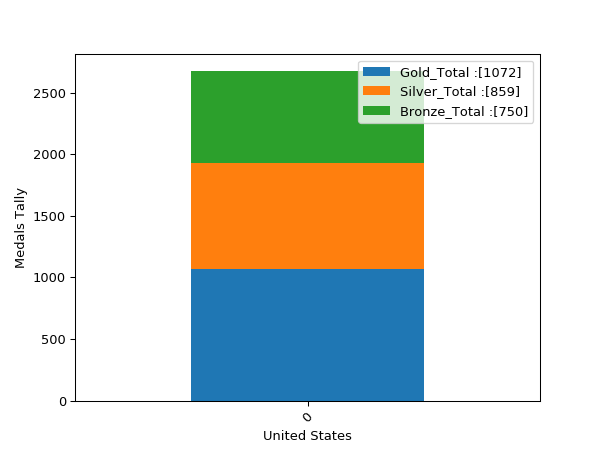

In [27]:
#Plotting bar plot
best.plot.bar(stacked=True)

#Changing the x-axis label
plt.xlabel('United States')

#Changing the y-axis label
plt.ylabel('Medals Tally')

#Rotating the ticks of X-axis
plt.xticks(rotation=45)

#Updating the graph legend
l=plt.legend()
l.get_texts()[0].set_text('Gold_Total :' + str(best['Gold_Total'].values))
l.get_texts()[1].set_text('Silver_Total :' + str(best['Silver_Total'].values))
l.get_texts()[2].set_text('Bronze_Total :' + str(best['Bronze_Total'].values))